# Data Exploration

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import os

In [2]:
# Full df (10 million images)
full_df = pd.read_csv('data/simplemaps.csv')
full_df = full_df[['uuid', 'source', 'orig_id', 'city_lat', 'city_lon']]

# Sampled df
sampled_df = pd.read_csv('data/imgs/sampled.csv', index_col=0)

/tmp/ipykernel_1807/1024195233.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  full_df = pd.read_csv('data/simplemaps.csv')


In [25]:
image_count = sum(len(file) for _, _, file in os.walk('data/imgs'))

print(f"Sample count: {sampled_df.shape[0]} / {full_df.shape[0]}")
print(f"Image count: {image_count} / {full_df.shape[0]}")
display(full_df.head())
display(sampled_df.head())

Sample count: 10000 / 10004551
Image count: 9725 / 10004551


,uuid,source,orig_id,city_lat,city_lon
0,d3cca4a7-7994-47ff-9749-7df8ca7228e3,Mapillary,412070930384924,26.2458,127.7219
1,33f474ab-496e-41a7-86a6-08fad8fe6638,Mapillary,897137344568478,26.2458,127.7219
2,0da8bf8d-bf34-4d94-aa51-2a7a3c880f6b,Mapillary,266236242103987,26.2458,127.7219
3,23c0aa2e-573b-4a3f-a65b-fb8f7349725b,Mapillary,646336503014104,26.2458,127.7219
4,4f47ba8e-8437-4213-9721-8336b02ea703,Mapillary,404485487755735,26.2458,127.7219


,uuid,source,orig_id,city_lat,city_lon
0,9cfc6a19-03b2-4da9-bc66-f8b843c49dde,Mapillary,919573842229671,41.3300,19.8200
1,0a754b18-569f-47d1-90da-0173afa00e20,Mapillary,463318074753512,47.4983,19.0408
2,58c2e69e-28d6-44bf-a535-6968c639e440,Mapillary,2229669760519590,12.1080,-68.9350
3,69fbdf11-cd1b-43cd-a53e-b63cc75bc504,Mapillary,309806313998874,34.0882,-118.3718
4,30e65e67-7f7a-45b1-827a-a4c9e70c50f2,Mapillary,500108744763197,35.4333,139.6333


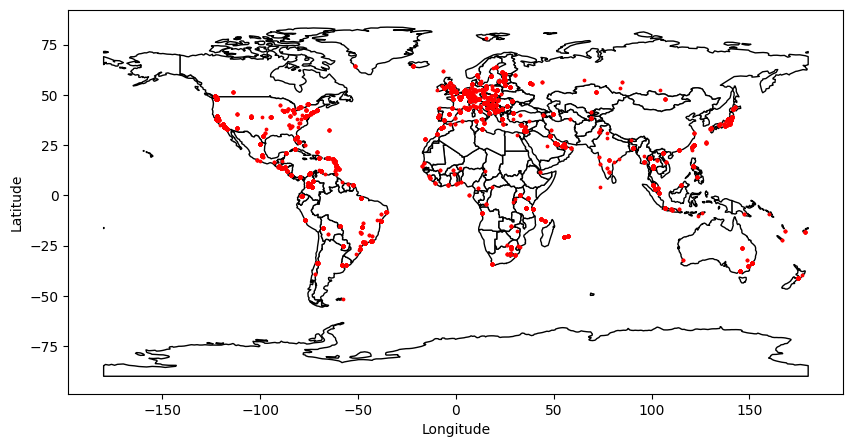

In [ ]:
# TODO: Would be nice if it was interactive
# NOTE: Are the ocean coordinates islands or errors? 

world = gpd.read_file("data/maps/ne_110m_admin_0_countries.shp")
gdf = gpd.GeoDataFrame(sampled_df, geometry=gpd.points_from_xy(sampled_df['city_lon'], sampled_df['city_lat']), crs="EPSG:4326")

fig, ax = plt.subplots(figsize=(10, 6))
world.plot(ax=ax, color='white', edgecolor='black')
gdf.plot(ax=ax, color='red', markersize=3)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()